In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [15, 9]

df = pd.read_csv('data/crypto.csv')

df

,Asset_Name,timestamp,Close
0,Bitcoin Cash,2018-01-01,2374.5900
1,Bitcoin Cash,2018-01-02,2323.3200
2,Bitcoin Cash,2018-01-03,2551.2850
3,Bitcoin Cash,2018-01-04,2557.6467
4,Bitcoin Cash,2018-01-05,2354.4433
...,...,...,...
18097,Dogecoin,2021-09-17,0.2416
18098,Dogecoin,2021-09-18,0.2401
18099,Dogecoin,2021-09-19,0.2413
18100,Dogecoin,2021-09-20,0.2331


<Axes: xlabel='timestamp'>

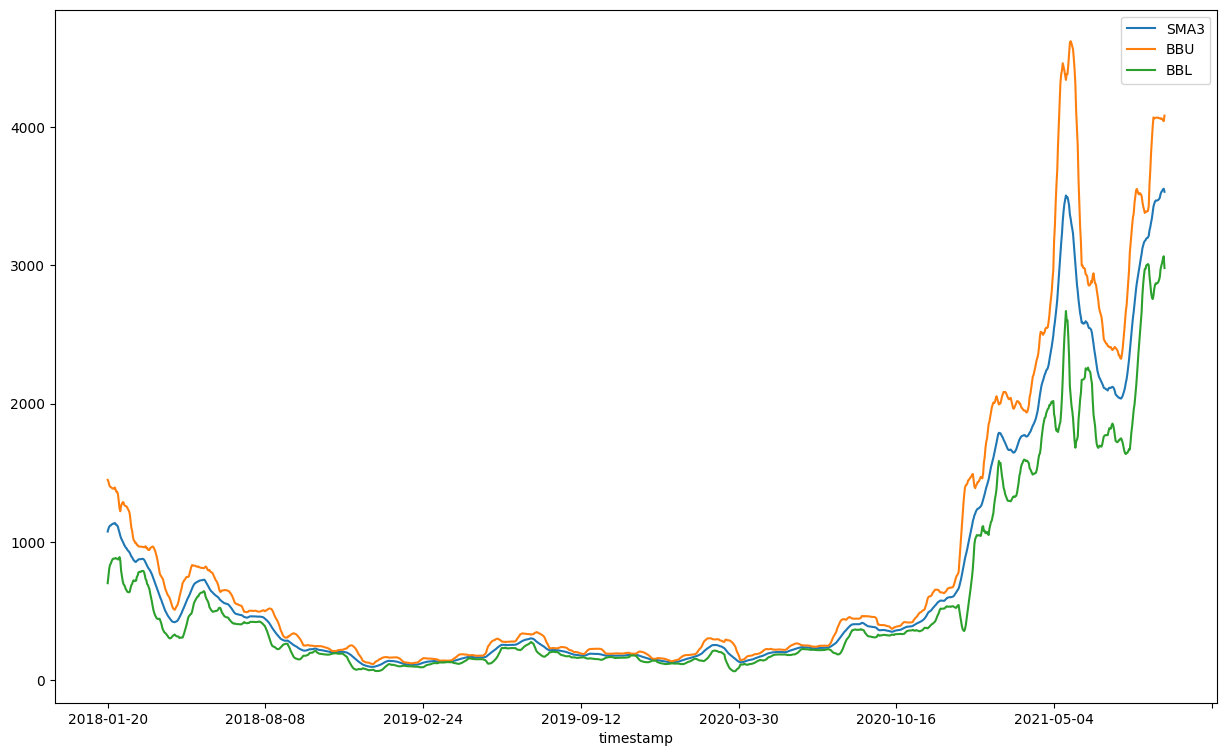

In [9]:
eth = df[df['Asset_Name'] == 'Ethereum']

eth = eth[['Close','timestamp']].copy()
eth['SMA3'] = eth['Close'].rolling(20).mean()
eth['BBU'] = eth['Close'].rolling(20).std() + eth['Close'].rolling(20).std() + eth['SMA3']
eth['BBL'] = eth['SMA3'] - eth['Close'].rolling(20).std() - eth['Close'].rolling(20).std()

eth.dropna(inplace=True)
eth.head()

eth.set_index('timestamp')[['SMA3', 'BBU', 'BBL']].plot(label='Ethereum',figsize=(15,9))